# Tensorflow in Practice Course 1: Week 2

1. Vid1: A conversation with andrew ng
2. Vid2: An introduction to computer vision
    - Basic intro
    - Intro to fashion MNIST dataset
    - Intuition about what a computer vision model does
3. Reading: Exploring how to use data
4. [Vid3: Writing code to load training data](#optparam1)
5. [Reading: The structure of fashion MNIST data and avoiding bias](#optparam2)
    - Bias reading at: https://developers.google.com/machine-learning/fairness-overview/
6. [Vid4: Coding a computer vision neural network](#optparam3)
7. Reading: See how its' done
8. [Vid5: Walk through a notebook](#optparam4)
9. Reading: Get hands on
    - This reading is important
    - They have given a few exercises which they've asked to try out
    - Exercises could be found at the bottom [here](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb)
   


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

<a id="optparam1"></a>
### Loading data

* fashion_mnist is a module
* load_data() method on it downloads the data for us and saves it in a local directory
* It also makes it availabe for us in a train-test split format.
* We receive it as two tuples of train and test respectively

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

<a id="optparam2"></a>
### Structure of MNIST data

* Lets quickly check the types of data and labels

In [3]:
type(train_images)

numpy.ndarray

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

* So the data is in the form of arrays i.e. pixel values
* train_images has 60k images each of 28 x 28 size grey scale
* labels are also 60k obviously

In [6]:
test_images.shape

(10000, 28, 28)

* There are 10k images in the test dataset
* First image in train set can be accessed using

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_images[0].shape

(28, 28)

### Using matplotlib we can plot an numpy array as an image

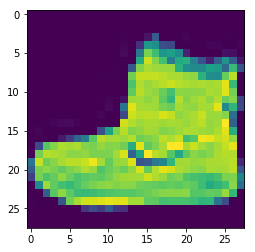

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(train_images[0])

### Normalizing data

* Neural networks work well with normalized data
* We will simply divide the image pixels by 255

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

* We can see the value of pixels have changed in the previous printing of the same array

<a id="optparam3"></a>
### Defining the model

* keras.sequential defines what kind of a network its going to be ex: sequential, recurrent etc..
* Within that we define a list. Each element of list comprises a layer in our network
* We can use keras.layers module to pick and choose different layers
* Since we have images as 28 x 28 matrices, we will need to flatten them as the first layer to our NN is always all pixels of the image as one array. That is exactly what keras.layer.Flatten() does
* Next we add two dense layers. 128 is the number of hidden neurons
* 10 is the number of labels
* Last layer receives a softmax activation expectedly
* Hidden layer receives a ReLu (rectified linear unit) activation

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

<a id="optparam4"></a>
### Compiling, fitting and evaluating the model

* Once a network is built in keras, a compile method is available to define **optimizer** and **loss**

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5025
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3131
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951


In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3469


0.34690427780151367

### Getting hands on: Exercises

* Where to find exercises is in the first cell of this notebook.

### Exercise 1

* *For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?*

In [15]:
classifications = model.predict(test_images)
print(classifications[0])

[1.2625068e-04 5.9904814e-08 2.7041457e-05 9.7035766e-08 9.8797909e-06
 5.5887173e-03 1.0052215e-05 3.6535464e-02 5.0224178e-05 9.5765221e-01]


* Type and size of the output

In [16]:
type(classifications)

numpy.ndarray

In [17]:
classifications.shape

(10000, 10)

* So the output from model.predict() method is a matrix of size **num_test_examples x num_labels**
* This means each row vector represents probabilities of that test example being the corresponding number
* Ex: Following are the probabilities of test example 0 being each of the label

In [18]:
pred_test_0 = list(classifications[0])
pred_test_0 = [np.round(i, 3) for i in pred_test_0]
pred_test_0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.037, 0.0, 0.958]

In [19]:
print(test_labels[0])

9


* So as we can see our model has predicted this to be the right label as the last element in **pred_test_0** representing the probabilitiy of the test_label[0] being 9 is the highest i.e. 93.9%

## Exercise 2

* *Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?*

- **tf.keras.layers.Flatten()** unrolls the incoming input from the last layer into 1 vector

In [20]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [21]:
model_2.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')
start = time.time()
model_2.fit(train_images, train_labels, epochs=5)
end = time.time()
print("\n")
print(f"The above operation took {(end - start)/60} minutes to run")

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4698
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3602
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3226
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2951
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2772


The above operation took 1.2265979886054992 minutes to run


In [22]:
model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3342


0.33423087000846863

In [34]:
classifications_2 = model_2.predict(test_images)
pred_test_0 = list(classifications_2[0])
pred_test_0 = [np.round(i, 3) for i in pred_test_0]
pred_test_0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.999]

* We got a 0.33 loss on test which is not a very big improvement
* So **increasing hidden neurons doesn't make an difference for our data**
* We changed the hidden neurons to **1024**
* Now lets try adding 2 hidden layers with less hidden neurons and check the results

In [23]:
model_3 = keras.models.Sequential([keras.layers.Flatten(),
                                  keras.layers.Dense(56, activation=tf.nn.relu),
                                  keras.layers.Dense(56, activation=tf.nn.relu),
                                  keras.layers.Dense(10, activation=tf.nn.softmax)])

model_3.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')
start = time.time()
model_3.fit(test_images, test_labels, epochs=5)
end = time.time()
print(f"The above operation took {(end - start)/60} minutes to run")

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.8077
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5212
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4755
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4290
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4111
The above operation took 0.05931601126988729 minutes to run


* We can see this model ran very quickly than eariler model only within a few seconds than 1+ minute.
* Lets check the results now

In [25]:
print(f"Loss on test set for model_3 is {model_3.evaluate(test_images, test_labels)}")

313/313 [==============================] - 0s 2ms/step - loss: 0.3831
Loss on test set for model_3 is 0.3830711543560028


* The loss worsened so adding additional layers also was not a great idea. Although I have given 56 neurons to each layer in this as opposed to 128 hidden units single hidden layer earlier.

In [26]:
classifications_3 = model_3.predict(test_images)
pred_test_0 = list(classifications_3[0])
pred_test_0 = [np.round(i, 3) for i in pred_test_0]
print(f"\nProbabilities model_3 predicted for 1st test example are {pred_test_0}")


Probabilities model_3 predicted for 1st test example are [0.0, 0.0, 0.001, 0.0, 0.0, 0.131, 0.0, 0.475, 0.064, 0.328]


* We can see that the increased loss reflects in the proababilities as well i.e. proability values get worst.
* Instead of 90+% probability for test example 0, we are now predicting this image to be label 9 with 32.8% probabilitiy


### Exercise 3

* *What would happen if you remove the Flatten() layer. Why do you think that's the case?*



**Ans:** This is pretty straightforward as it will throw an error. Any image input to a network has to go in flattened for a multilayer perceptron atleast

### Exercise 4

* *Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5*

**Ans:** Again for someone who has learnt how the architectures work, this is straightforward. Since, for training the data, we are providing exaclty 10 labels, our architecture needs to have an output of size 10.

### Exercise 5

* *Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.*

**Ans:** We already did this above as an extra step in exercise 2. There was no big impact as this data is less complex so we don't need multiple layers to identify the patterns. If it was an **animal classifier** or something like that then we would need multiple layers.

### Exercise 6

* *Consider the impact of training for more or less epochs. Why do you think that would be the case?*

* Lets try increasing epochs to 20

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),\
             loss='sparse_categorical_crossentropy')

num_epochs = 20
start = time.time()
model.fit(test_images, test_labels, epochs=num_epochs)
end = time.time()
print(f"The above operation took {(end - start)/60} minutes to run")

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7161
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.5167
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4636
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4333
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.4025
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3780
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3573
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3461
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3220
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3115
Epoch 11/20
313/313 [==============================] - 1s 2ms/step - loss: 0.3006
Epoch 12/20
313/313 [==============================] - 1s 2ms/step - loss: 0.2876
Epoch 13/20
313/313 [====

In [28]:
print(f"Loss on test set for model with 20 epochs is {model.evaluate(test_images, test_labels)}")

313/313 [==============================] - 0s 1ms/step - loss: 0.1960
Loss on test set for model with 20 epochs is 0.1960430145263672


* Increasing the epochs reduced the loss which is encouraging

In [29]:
classifications = model.predict(test_images)
pred_test_0 = list(classifications[0])
pred_test_0 = [np.round(i, 3) for i in pred_test_0]
print(f"\nProbabilities model with 20 epochs predicted for 1st test example are {pred_test_0}")


Probabilities model with 20 epochs predicted for 1st test example are [0.0, 0.0, 0.0, 0.0, 0.0, 0.011, 0.0, 0.518, 0.0, 0.47]


* But wait, why did the probabilities get worst then? This is due to **overfitting**. We trained the model so much that it adapted itself to the data it could see more than it should. And now when we give it unseen data, it is getting confused.
* Lets try a bizzare number 50 now for epochs. We will pass **verbose=0** to fit method so that results are not printed out.

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),\
             loss='sparse_categorical_crossentropy')

num_epochs = 50
start = time.time()
model.fit(test_images, test_labels, epochs=num_epochs, verbose=0)
end = time.time()
print(f"The above operation took {(end - start)/60} minutes to run")

The above operation took 0.34328678448994954 minutes to run


In [31]:
print(f"Loss on test set for model with {num_epochs} epochs is {model.evaluate(test_images, test_labels)}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0625
Loss on test set for model with 50 epochs is 0.06252358108758926


* The loss reduced further.

In [32]:
classifications = model.predict(test_images)
pred_test_0 = list(classifications[0])
pred_test_0 = [np.round(i, 3) for i in pred_test_0]
print(f"\nProbabilities model with {num_epochs} epochs predicted for 1st test example are {pred_test_0}")


Probabilities model with 50 epochs predicted for 1st test example are [0.0, 0.0, 0.0, 0.0, 0.0, 0.022, 0.0, 0.008, 0.0, 0.969]


* We are getting good results on this training example
* Although increasing the epochs so much is not ideally advisable but it will be interesting to figure out why the results got better. Would the results have stayed the same had we had one more validation set apart from test set?


### Exercise 7

* *Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?*

In [46]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_labels.shape

(60000,)

In [47]:
train_images.shape

(60000, 28, 28)

In [50]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.6504
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6509
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5596
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5302
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5083


In [51]:
print(f"Loss on test set with model training on non-normalized data is {model.evaluate(test_images)}")

313/313 [==============================] - 0s 939us/step - loss: 0.0000e+00
Loss on test set with model training on non-normalized data is 0.0


### Exercise 8: Callbacks - to be done after the next video


### Video 6: Callbacks

* Lets say you want to train a model with 100 epochs but you don't want your performance to weaken.
* You want to stop as soon as the performance starts getting worst.
* Enter the world of callbacks. What callback does, is after every epoch, the validation metrics are diverted to a function which then checks the metrics.
* If looking at the values, it is good to proceed, the model training proceeds else it terminates

##### What is the following code potentially doing?

* In the following code we create our own callback class which inherits from tf.keras.callbacks.Callback class
* We pass the instance of the callback class to the model.fit() method
* This object has all the details of the training process available and hence, the logs{} dict we provide to the on_epoch_end method is actually filled when it is called by the model.fit() object while training.
* So when we provide an instance to the fit method, we will assume that the info will be available and we need to code the methods in the callback under this assumption. We just need to know the important details of **how** and **where** these details will be available ex: in logs dict.
* In the call back class we define a method called as **on_epoch_end** which is called everytime the callback is executed.
* In the function, we get a logs dict which has a lot of useful info about the training including what loss value is at the current iteration.
* We can then use this loss info to modify the behaviour of the training further by changing an attribute of our class as we have set model.stop_training to True when loss goes below 0.4 in the following code.

##### To use callbacks

* We
    1. define the callback class
    2. instantiate it
    3. let the fit method know that we want to use a callback

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epochs, logs={}):
        if (logs.get('loss') < 0.4):
            print("\nLoss is low so cancelling training")
            self.model.stop_training = True

callbacks = myCallback()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5010
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3738
Loss is low so cancelling training
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738


### Callbacks additional notes

* model.fit() is like a paper plane. Apart from the inital impulse, you have no control over where the plane is going to end and if it is going to result in a wasted paper plane.
* Drone is better as drone send the data back to its user, and acts on its current environment dynamically.
* **Callbacks** convert the model.fit() from a paper plane to a drone which you have more control over.
* CB has access to all the data being produced about the state of the model and its performance.

### Following are a few things one can do using callbacks:

* Model checkpointing—Saving the current weights of the model at different points during training.
* Early stopping—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
* Dynamically adjusting the value of certain parameters during training—Such as the learning rate of the optimizer.
* Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated—The Keras progress bar that you’re familiar with is a callback!